In [82]:
import pandas as pd
import nltk

# Loading Dataset

In [83]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    df = delete_movies(movies_delete, df)
    return df

In [84]:
def delete_movies(lst, df):
    indices = df[df['movie_name'].isin(lst)].index
    df = df.drop(indices)
    return df

In [85]:
movies_delete = ['Guardians of the Galaxy Vol 2', 'Guardians of the Galaxy',
       'Rocketman', 'The Invisible Man', '12 Years a Slave',
       'Murder on the Orient Express', 'X-Men', 'Teen Wolf']

In [86]:
movies_df = load_dataset('data/all_movies.csv')
delete_movies(movies_delete, movies_df)
movies_df.head()

,movie_name,index,utterance,count_utterances,tag
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism
2,12 Angry Men,2,Shh. Shh.,2065,racism
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism


In [87]:
movies_df.shape

(351280, 5)

In [88]:
hate_keywords_df = pd.read_csv('data/all_hate_keywords.csv', index_col=0)
hate_keywords_twitter = pd.read_csv('data/hate_keys_twitter.csv', header=None)
hate_keywords_twitter = hate_keywords_twitter.rename(columns={0:'term'})
hate_keywords_twitter['source'] = 'twitter'
hate_keywords_df = hate_keywords_df.append(hate_keywords_twitter)

In [89]:
hate_keywords_df

,term,source
0,Paedo,hatebase
1,Hodgie,hatebase
2,sand ape,hatebase
3,islamization,hatebase
4,porki,hatebase
...,...,...
30,niggah,twitter
31,dick,twitter
32,retard,twitter
33,whitey,twitter


# Word Embedding

In [90]:
annotations_word_embedding_fox_news_df = load_dataset('annotations/annotations_word_embedding_fox_news.csv')
annotations_word_embedding_fox_news_df.rename(columns={'label': 'we_label_fox_news'}, inplace=True)
annotations_word_embedding_fox_news_df

,movie_name,index,we_label_fox_news
0,12 Angry Men,0,not hate speech
1,12 Angry Men,1,not hate speech
2,12 Angry Men,2,not hate speech
3,12 Angry Men,3,not hate speech
4,12 Angry Men,4,hate speech
...,...,...,...
359031,You,1767,not hate speech
359032,You,1768,not hate speech
359033,You,1769,not hate speech
359034,You,1770,not hate speech


In [91]:
annotations_word_embedding_twitter_df = load_dataset('annotations/annotations_word_embedding_twitter.csv')
annotations_word_embedding_twitter_df.rename(columns={'label': 'we_label_twitter'}, inplace=True)
annotations_word_embedding_twitter_df

,movie_name,index,we_label_twitter
0,12 Angry Men,0,neither
1,12 Angry Men,1,neither
2,12 Angry Men,2,offensive language
3,12 Angry Men,3,neither
4,12 Angry Men,4,neither
...,...,...,...
359031,You,1767,offensive language
359032,You,1768,neither
359033,You,1769,neither
359034,You,1770,offensive language


# Bert

In [92]:
annotations_bert_fox_news_df = load_dataset('annotations/annotations_bert_fox_news.csv')
annotations_bert_fox_news_df.rename(columns={'label': 'bert_label_fox_news'}, inplace=True)
annotations_bert_fox_news_df

,index,movie_name,bert_label_fox_news
0,0,1917,hate speech
1,1,1917,not hate speech
2,2,1917,not hate speech
3,3,1917,not hate speech
4,4,1917,not hate speech
...,...,...,...
360126,1032,Wrong Turn,not hate speech
360127,1033,Wrong Turn,not hate speech
360128,1034,Wrong Turn,hate speech
360129,1035,Wrong Turn,not hate speech


In [93]:
annotations_bert_twitter_df = load_dataset('annotations/annotations_bert_twitter.csv')
annotations_bert_twitter_df.rename(columns={'label': 'bert_label_twitter'}, inplace=True)
annotations_bert_twitter_df

,index,movie_name,bert_label_twitter
0,0,1917,neither
1,1,1917,neither
2,2,1917,neither
3,3,1917,neither
4,4,1917,neither
...,...,...,...
360126,1032,Wrong Turn,neither
360127,1033,Wrong Turn,neither
360128,1034,Wrong Turn,neither
360129,1035,Wrong Turn,offensive language


# LSTM

In [94]:
annotations_lstm_fox_news_df = load_dataset('annotations/annotations_lstm_fox_news.csv')
annotations_lstm_fox_news_df.rename(columns={'label': 'lstm_label_fox_news'}, inplace=True)
annotations_lstm_fox_news_df

,movie_name,index,lstm_label_fox_news
0,A Time to Kill,0,not hate speech
1,A Time to Kill,1,not hate speech
2,A Time to Kill,2,not hate speech
3,A Time to Kill,3,not hate speech
4,A Time to Kill,4,not hate speech
...,...,...,...
359031,Wind River,1264,not hate speech
359032,Wind River,1265,not hate speech
359033,Wind River,1266,not hate speech
359034,Wind River,1267,hate speech


In [95]:
annotations_lstm_twitter_df = load_dataset('annotations/annotations_lstm_twitter.csv')
annotations_lstm_twitter_df.rename(columns={'label': 'lstm_label_twitter'}, inplace=True)
annotations_lstm_twitter_df

,movie_name,index,lstm_label_twitter
0,Falling Down,0,offensive language
1,Falling Down,1,offensive language
2,Falling Down,2,offensive language
3,Falling Down,3,neither
4,Falling Down,4,offensive language
...,...,...,...
359031,The Social Network,2405,offensive language
359032,The Social Network,2406,offensive language
359033,The Social Network,2407,offensive language
359034,The Social Network,2408,neither


# Joining Datasets

In [113]:
df_results = movies_df.merge(annotations_word_embedding_fox_news_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_word_embedding_twitter_df, on=['index', 'movie_name'])

In [114]:
df_results = df_results.merge(annotations_bert_twitter_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_bert_fox_news_df, on=['index', 'movie_name'])

In [115]:
df_results = df_results.merge(annotations_lstm_twitter_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_lstm_fox_news_df, on=['index', 'movie_name'])

In [116]:
df_results.head()

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech


In [100]:
df_results

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech
...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech


In [20]:
df_results.to_csv('results.csv')

## Analyse Results

In [21]:
def plot_label_by_tag_distribution(df, title, label):
    df = df_results.groupby('tag')[label].value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns=label
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [22]:
def plot_label_by_tag_distribution_percentage(df, title, label):
    ax = df_results.groupby('tag')[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

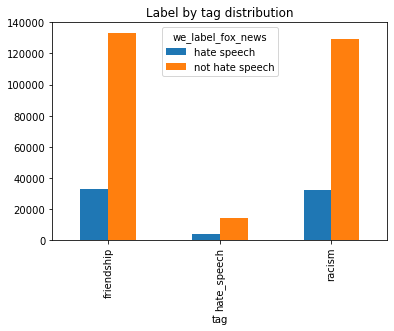

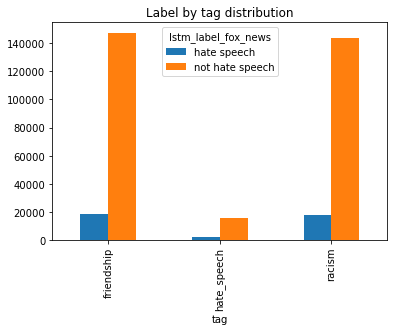

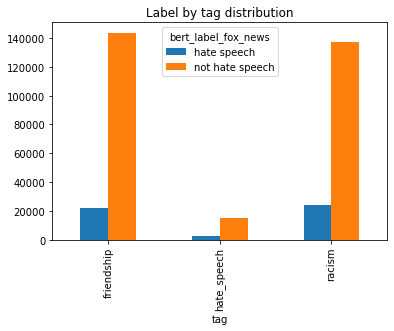

In [23]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='we_label_fox_news')
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='lstm_label_fox_news')
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='bert_label_fox_news')

<AxesSubplot:title={'center':'Bert, Label by tag distribution (Percentage)'}, xlabel='tag'>

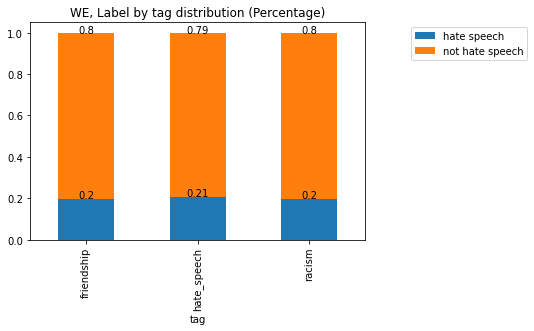

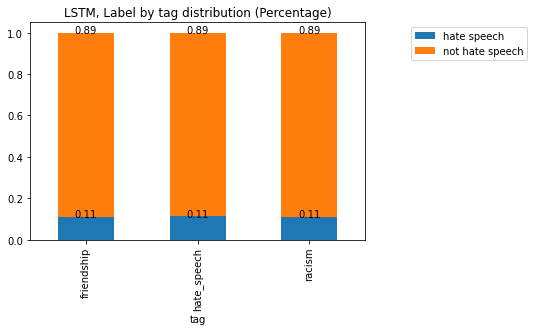

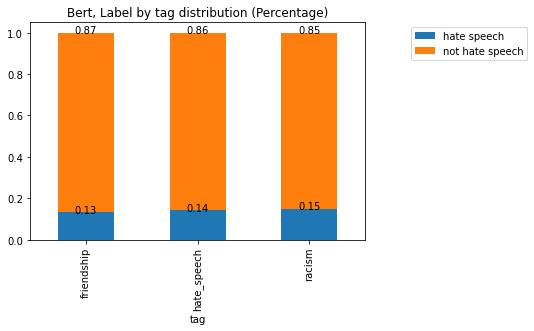

In [24]:
plot_label_by_tag_distribution_percentage(df_results, title='WE, Label by tag distribution (Percentage)', label='we_label_fox_news')
plot_label_by_tag_distribution_percentage(df_results, title='LSTM, Label by tag distribution (Percentage)', label='lstm_label_fox_news')
plot_label_by_tag_distribution_percentage(df_results, title='Bert, Label by tag distribution (Percentage)', label='bert_label_fox_news')

## hate speech examples

In [26]:
hatespeech_sentences = df_results[df_results.we_label_fox_news=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

 For a moment, we had our doubts.
---
murder in the first degree.
---
A premeditated murder is the most serious charge tried in our criminal courts.
---
One man is dead.
---
If there's a reasonable doubt in your minds as to the guilt of the accused...
---
a reasonable doubt...
---
then you must bring me a verdict of not guilty.
---
Now if, however, there's no reasonable doubt...
---
The alternate jurors are excused.
---
Oh, I thought we might want to vote by ballot.
---
Yeah? I almost fell asleep.
---
even when it's an openandshut case like this one.
---
 Mr. Foreman.
---
 Gee, I don't know.
---
No real... dead spots.
---
I tell you, we were lucky to get a murder case.
---
Isn't that funny?
---
If you had to sort out all that junk...
---
Like that thing with the movies.
---
You know what we're dealing with.
---
Yeah, we can all get outta here pretty quick, huh?
---
Where do we sit here?
---
 I think it's reasonable to sit in order.
---
 Yeah. That's 12. We go around...
---
I beg pardon

# Word embedding

## Twitter

<AxesSubplot:title={'center':'Bert, Label by tag distribution'}, xlabel='tag'>

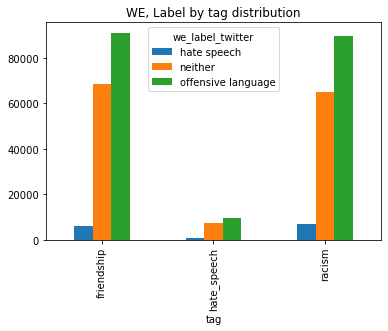

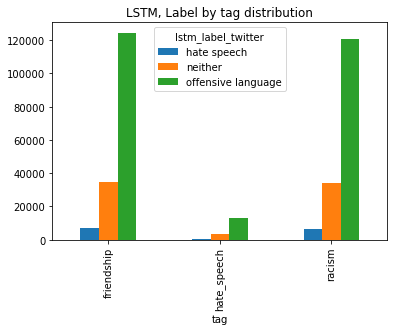

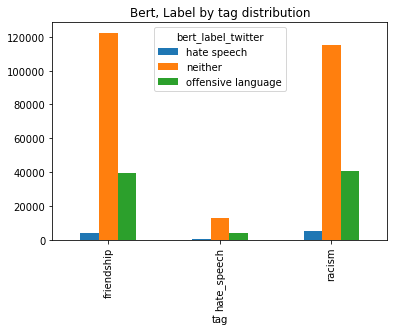

In [27]:
plot_label_by_tag_distribution(df_results, title='WE, Label by tag distribution', label='we_label_twitter')
plot_label_by_tag_distribution(df_results, title='LSTM, Label by tag distribution', label='lstm_label_twitter')
plot_label_by_tag_distribution(df_results, title='Bert, Label by tag distribution', label='bert_label_twitter')

<AxesSubplot:title={'center':'Bert, Label by tag distribution (Percentage)'}, xlabel='tag'>

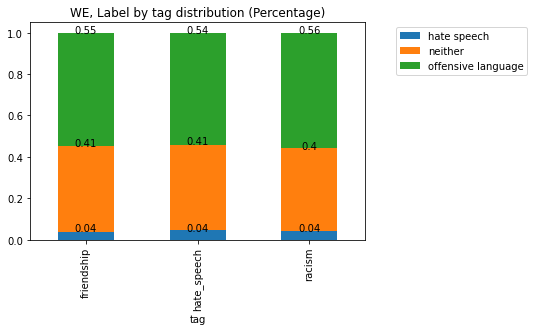

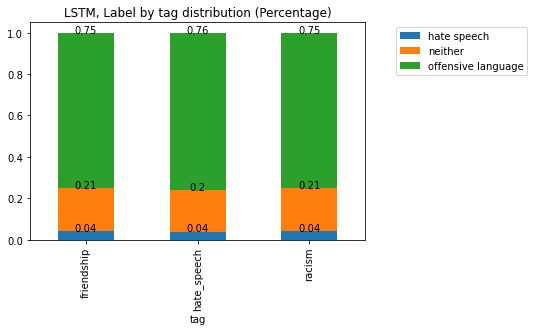

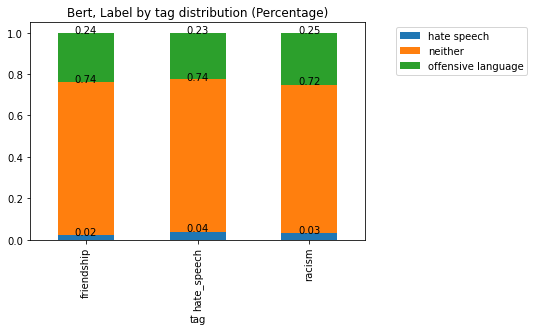

In [28]:
plot_label_by_tag_distribution_percentage(df_results, title='WE, Label by tag distribution (Percentage)', label='we_label_twitter')
plot_label_by_tag_distribution_percentage(df_results, title='LSTM, Label by tag distribution (Percentage)', label='lstm_label_twitter')
plot_label_by_tag_distribution_percentage(df_results, title='Bert, Label by tag distribution (Percentage)', label='bert_label_twitter')

In [30]:
hatespeech_sentences = df_results[df_results.we_label_twitter=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

A premeditated murder is the most serious charge tried in our criminal courts.
---
Okay, gentlemen, everybody's here.
---
even when it's an openandshut case like this one.
---
 What do you got, a cold?
---
Aw, listen, you analyze the figures, you'll see it happens all the time.
---
Is  Is everyone here?
---
Maybe we all can get outta here, huh?
---
Of course you know that we have a firstdegree murder charge here...
---
Would you like me to list them for you?
---
Do you believe his story?
---
I mean, they're born liars.
---
 Only an ignorant man can believe that.
---
Do you think you were born with a monopoly on the truth?
---
You see, I was looking for a motive.
---
Because if you don't have a motive, where's your case, right?
---
Well, you said it provided a motive.
---
It's a normal state of affairs with him.
---
It may have been two too many.
---
Well, look at his record.
---
 You got any kids?
---
He was born in a slum.
---
 Come on now.
---
What do you mean supposing they're wrong

# Metadata Analysis

In [31]:
df_results

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech
...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech


## Movie by tag distribution

In [32]:
df_results.groupby('movie_name').tag.max().to_frame(name='tag').reset_index().tag.value_counts()

racism         114
friendship     111
hate_speech     12
Name: tag, dtype: int64

## Median utterances of a movie distribution by tag

In [33]:
df_results.groupby(['movie_name', 'count_utterances']).tag.max().to_frame(name='tag').reset_index().groupby('tag').count_utterances.median()

tag
friendship     1512.0
hate_speech    1422.0
racism         1370.5
Name: count_utterances, dtype: float64

### fox news is "hate speech" and twitter is "offensive language"

In [36]:
label = 'hate speech'

In [37]:
df_results[(df_results.we_label_twitter==label) & (df_results.lstm_label_twitter==label) & (df_results.bert_label_twitter==label)]

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
301,12 Angry Men,301,Only an ignorant man can believe that.,2065,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
5769,A Time to Kill,455,"You niggerloving sonofabitch, you won't live i...",2219,racism,not hate speech,hate speech,hate speech,hate speech,hate speech,not hate speech
6182,A Time to Kill,868,I believe you know Reverend Agee.,2219,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
8742,American History X,462,Sweeney is a nigger on a powertrip.,1889,racism,hate speech,hate speech,hate speech,hate speech,hate speech,not hate speech
13773,Apocalypse Now,552,Get the fuck outta here.,2070,racism,not hate speech,hate speech,hate speech,hate speech,hate speech,hate speech
14050,Apocalypse Now,829,They burn him for it?,2070,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
27605,Chinatown,862,You...,1579,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
33650,Donnie Brasco,1351,You'd better fucking kill me.,2202,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
51334,Green Room,1061,You...,1330,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
65492,LA Confidential,25,"She's an art model, you stupid ape.",1337,racism,not hate speech,hate speech,hate speech,hate speech,hate speech,not hate speech


In [38]:
df_results[(df_results.movie_name=='BlacKkKlansman') & (df_results.bert_label_twitter=='hate speech')][['utterance', 'bert_label_twitter', 'lstm_label_twitter', 'we_label_twitter']]

,utterance,bert_label_twitter,lstm_label_twitter,we_label_twitter
162202,We had a great way of life until the Martin Lu...,hate speech,offensive language,neither
162203,Do you really want your precious white child g...,hate speech,offensive language,offensive language
162204,"They're lying, dirty monkeys, stopping at noth...",hate speech,offensive language,offensive language
162209,"Rapists, murderers, craving the virgin pure fl...",hate speech,offensive language,offensive language
162213,Using an army of outside northern black beast ...,hate speech,offensive language,offensive language
...,...,...,...,...
164699,White lives matter! White lives matter!,hate speech,offensive language,hate speech
164700,White lives matter!,hate speech,offensive language,hate speech
164702,Black lives matter!,hate speech,offensive language,offensive language
164705,"Nazis, go home!",hate speech,offensive language,offensive language


In [63]:
def add_hate_keyword_count(hate_keywords_df, df):
    hate_keywords = hate_keywords_df.term.values
    hate_keyword_sources = hate_keywords_df.source.values
    

    def iterate_over_utterance(text, target_var):
        text_tokenized = nltk.word_tokenize(text)
        
        sources = []
        words = []

        for i in range(0, len(hate_keywords)):
            hate_word = hate_keywords[i]
            if hate_word in text_tokenized:
                source = hate_keyword_sources[i]
                
                sources.append(source)
                words.append(hate_word)
                
        if target_var == 'count':
            return len(hate_word)
        elif target_var == 'source':
            return sources
        elif target_var == 'word':
            return hate_word
        elif target_var == 'count_unique':
            return len(set(hate_word))

    df['hate_keyword_count'] = df['utterance'].apply(iterate_over_utterance, target_var='count')
    df['hate_keyword_source'] = df['utterance'].apply(iterate_over_utterance, target_var='source')
    df['hate_keyword'] = df['utterance'].apply(iterate_over_utterance, target_var='word')
    df['hate_keyword_count_unique'] = df['utterance'].apply(iterate_over_utterance, target_var='count_unique')
    
    return df

In [144]:
hate_keywords = hate_keywords_df.term.values
hate_keyword_sources = hate_keywords_df.source.values
result = []

for index, row in df_result_2.iterrows():
    sources = []
    words = []
    text_tokenized = nltk.word_tokenize(row.utterance)
    
    for i in range(0, len(hate_keywords)):
        hate_word = hate_keywords[i]
        
        if hate_word in text_tokenized:
            print(hate_word)
            print(text_tokenized)
            source = hate_keyword_sources[i]
            sources.append(source)
            words.append(hate_word)
                
    result.append({'hate_keyword_count': len(words), 'hate_keyword_count_unique': len(set(words)), 'index': index, 'words': words, 'sources': sources})
    if index % 10000== 0:
        print(index, df_result_2.shape[0])
result_df_new = pd.DataFrame(result)

['Thank', 'you', 'very', 'much', ',', 'sir', '.']
0 344346
['You', 'did', 'a', 'wonderful', 'job', '.', 'Wonderful', '.']
['Shh', '.', 'Shh', '.']
['We', 'did', 'it', ',', 'Pete', '.', 'We', 'did', 'it', '.']
['For', 'a', 'moment', ',', 'we', 'had', 'our', 'doubts', '.']
['Shh', '.']
['To', 'continue', ',', 'you', "'ve", 'listened', 'to', 'a', 'long', 'and', 'complex', 'case', '...']
['murder', 'in', 'the', 'first', 'degree', '.']
['A', 'premeditated', 'murder', 'is', 'the', 'most', 'serious', 'charge', 'tried', 'in', 'our', 'criminal', 'courts', '.']
['You', "'ve", 'listened', 'to', 'the', 'testimony', '.']
['You', "'ve", 'had', 'the', 'law', 'read', 'to', 'you', 'and', 'interpreted', 'as', 'it', 'applies', 'in', 'this', 'case', '.']
['It', "'s", 'now', 'your', 'duty', 'to', 'sit', 'down', 'and', 'try', 'and', 'separate', 'the', 'facts', 'from', 'the', 'fancy', '.']
['One', 'man', 'is', 'dead', '.']
['Another', 'man', "'s", 'life', 'is', 'at', 'stake', '.']
['If', 'there', "'s", 'a', 

KeyboardInterrupt: 

In [72]:
result_df_new

,hate_keyword_count,hate_keyword_count_unique,index,words,sources
0,4,4,0,[],[]
1,4,4,1,[],[]
2,4,4,2,[],[]
3,4,4,3,[],[]
4,4,4,4,[],[]
...,...,...,...,...,...
344341,4,4,344341,[],[]
344342,4,4,344342,[],[]
344343,4,4,344343,[],[]
344344,4,4,344344,[],[]


In [119]:
del result_df_new['index']

In [120]:
result_df_new

,hate_keyword_count,hate_keyword_count_unique,words,sources
0,0,0,[],[]
1,0,0,[],[]
2,0,0,[],[]
3,0,0,[],[]
4,0,0,[],[]
...,...,...,...,...
344341,0,0,[],[]
344342,0,0,[],[]
344343,0,0,[],[]
344344,0,0,[],[]


In [121]:
df_result_2

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news,hate_keyword_count,hate_keyword_source,hate_keyword,hate_keyword_count_unique
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech,4,[],[],0
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,4,[],[],0
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech,4,[],[],0
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,4,[],[],0
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech,4,[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech,4,[],[],0
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,4,[],[nig],1
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech,4,[],[],0
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech,4,[],[],0


In [106]:
df_results

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech
...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech


In [152]:
result_df_new

,hate_keyword_count,hate_keyword_count_unique,words,sources
0,0,0,[],[]
1,0,0,[],[]
2,0,0,[],[]
3,0,0,[],[]
4,0,0,[],[]
...,...,...,...,...
344341,0,0,[],[]
344342,0,0,[],[]
344343,0,0,[],[]
344344,0,0,[],[]


In [153]:
df_results_2 = df_results.merge(result_df_new, left_index=True, right_index=True)

In [159]:
df_results_2

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news,hate_keyword_count,hate_keyword_count_unique,words,sources
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech,0,0,[],[]
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech,0,0,[],[]
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech,0,0,[],[]
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech,0,0,[],[]
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech,0,0,[],[]


In [166]:
df_results_2.rename(columns={'words': 'hate_keyword', 'sources': 'hate_keyword_sources'}, inplace=True)

In [167]:
df_results_2

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news,hate_keyword_count,hate_keyword_count_unique,hate_keyword,hate_keyword_sources
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech,0,0,[],[]
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech,0,0,[],[]
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech,0,0,[],[]
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech,0,0,[],[]
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech,0,0,[],[]
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech,0,0,[],[]


In [151]:
text_tokenized = nltk.word_tokenize('Weed is for niggers.')
for i in range(0, len(hate_keywords)):
    hate_word = hate_keywords[i]

    if hate_word in text_tokenized:
        print(hate_word)
        print(text_tokenized)
        source = hate_keyword_sources[i]
        sources.append(source)
        words.append(hate_word)

niggers
['Weed', 'is', 'for', 'niggers', '.']
niggers
['Weed', 'is', 'for', 'niggers', '.']


In [160]:
df_results_2.hate_keyword_count.value_counts()

0    332252
1     10858
2       775
4       268
3       144
5        39
6         9
7         1
Name: hate_keyword_count, dtype: int64

In [161]:
df_results_2.to_csv('results.csv')

In [163]:
df_results_2[df_results_2.utterance=='Weed is for niggers.'].words[8848]

['niggers', 'niggers']